
- TV — 2–6 weeks half life

- Radio — 1–5 weeks half life

- Newspaper — 2–3 weeks half life

- Print magazines — 4–8 weeks half life

- Online (upper funnel) — 2–4 weeks half life

- Online (lower funnel) — 1–2 weeks half life


### References 

- https://medium.com/@Marko_Mi/advertising-adstock-theory-85cc9e26ea0e

In [5]:
import matplotlib.pyplot as plt
import numpy as np


Geometric Adstock
------------------

 $$A(t) = A(t) + \lambda * A(t-1)$$


The half-life in the context of the adstock formulation is the time it takes for the adstock to decay to half of its value in the absence of new advertising expenditure. In this particular case we have

$$A(t_{1/2}) = 0 + \lambda* A(t_{1/2}-1)$$
$$A(t_{1/2}) = \lambda * A(t_{1/2}-1)$$

which in that case become a geometric sequence for which we know the general form 
$${\displaystyle a_{n}=a_{m}\,r^{n-m}.}$$

Therefore 
$$A(t_{1/2}) = A_{0} * \lambda ^{t_{1/2}-0}$$
$$A(t_{1/2}) = A_{0} * \lambda ^{t_{1/2}}$$

But we remember that we know at $t_{1/2}$,  $A (t_{1/2}) = \frac{A_0}{2}$


Therefore we then have the equation 

$$\frac{A_0}{2} = A_{0} * \lambda^{t_{1/2}}$$
Rearranging to solve for the half-life:

$$\frac{1}{2} = \lambda^{t_{1/2}}$$

$$ t_{1/2} = \frac{\log(0.5)}{\log(\lambda)}$$


It is very comon that marketers communicate halflife we get: 

$$  \lambda = 0.5^{t_{1/2}}$$

In [22]:
def calculate_decay_rate(half_life):
    return 0.5 ** (1 / half_life)


def calculate_half_life(decay_factor):
    return np.log(0.5) / np.log(decay_factor)



print(calculate_decay_rate(1.94))

print(calculate_half_life(1.94))

0.6995679413716849


> For a half-life of 1.94 time units, the decay rate $lambda$ is approximately 0.7.

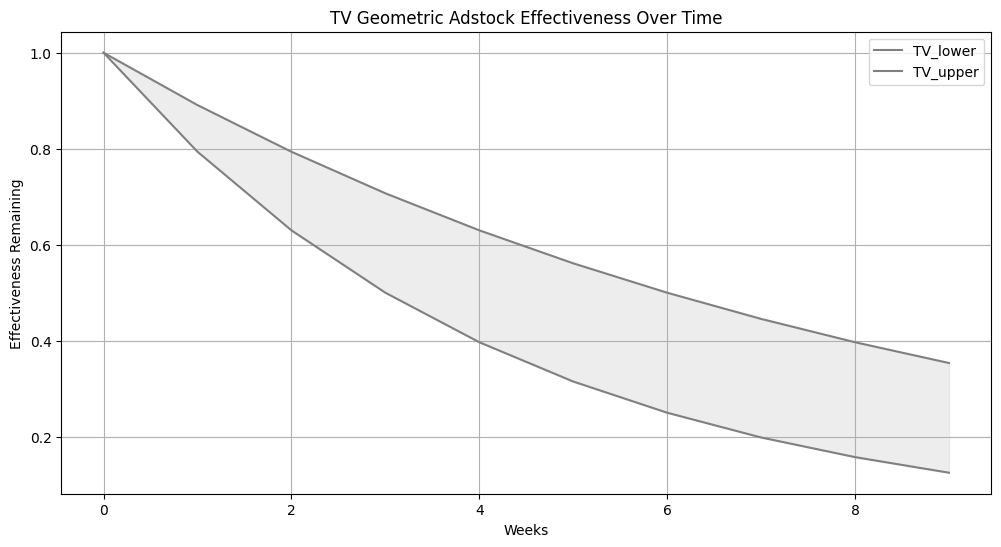

In [29]:

def adstock_effectiveness(initial_effectiveness, decay_rate, periods):
    effectiveness = [initial_effectiveness]
    for _ in range(1, periods):
        effectiveness.append(effectiveness[-1] * decay_rate)
    return np.array(effectiveness)



def plot_adstock_effect(initial_effectiveness = 1.0,periods=10):
    
    
    half_lives = {
        # 'Digital Display': 2.2, 
        #           'Digital OLV': 0.5, 
                  # 'TV': 2, 
                'TV_lower': 3, 
                  "TV_upper" :6,
                  # 'Paid Search': 0.5
                 }
    
    colors = {
        # 'Digital Display': 'purple', 
        #       'Digital OLV': 'orange', 
        #       'Social': 'black', 
              'TV_upper': 'grey',
              'TV_lower': 'grey'
    }
    
    weeks = range(periods)
    plt.figure(figsize=(12, 6))
    array_effectiveness = []
    for channel, half_life in half_lives.items():
        decay_rate = calculate_decay_rate(half_life)
        effectiveness = adstock_effectiveness(initial_effectiveness, decay_rate, periods)
        array_effectiveness.append(effectiveness)
        plt.plot(weeks, effectiveness, label=channel, color=colors[channel])
    
    plt.fill_between(weeks, 
                     array_effectiveness[0], 
                     array_effectiveness[1], 
                     color='lightgray', alpha=0.4)
    plt.xlabel('Weeks')
    plt.ylabel('Effectiveness Remaining')
    plt.title('TV Geometric Adstock Effectiveness Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_adstock_effect()